In [1]:
from google.colab import files
files.upload()

Saving reviews.csv.gz to reviews.csv.gz


In [2]:
import pandas as pd
df = pd.read_csv('reviews.csv.gz')

In [3]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,155305,409437,2011-07-31,844309,Jillian,We had a wonderful time! The cottage was very ...
1,155305,469775,2011-08-23,343443,Katie,Place was great! Can't really speak to the ins...
2,155305,548257,2011-09-19,1152025,Katie,We had a great time! The cabin was nice and a...
3,155305,671470,2011-10-28,1245885,Jason,Clean and comfortable room with everything you...
4,155305,1606327,2012-07-01,1891395,Craig,The cabin was solid for an overnight stay. It ...


In [4]:
#Date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [5]:
# checking missing values
df.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,1
comments,65


In [6]:
# Deleting the records where comments are missing
df = df.dropna(subset=['comments'])

In [7]:
# checking if there are any missing cells
df.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,1
comments,0


In [8]:
!pip install nltk textblob vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [10]:
import nltk
from nltk.corpus import stopwords
import re

# Downloading stopwords
nltk.download('stopwords')
# setting the language as english
stop_words = set(stopwords.words('english'))

# cleaning the text using a function
def preprocess_text(text):
    # Removing special characters and digits
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\d', '', text)
    # Converting text to lowercase
    text = text.lower()
    # Removing stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text
df['cleaned_text'] = df['comments'].apply(preprocess_text)
df.cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_text
0,wonderful time cottage comfortable although be...
1,place great really speak inside went inside ch...
2,great time cabin nice great value people frien...
3,clean comfortable room everything need short s...
4,cabin solid overnight stay bit smaller appeare...
...,...
331713,excellent rental trip group friends clean upda...
331714,absolutely love stay bedrooms large plenty win...
331715,embassy suite new free breakfast
331716,loved stay nice hotel close downtown would stay


In [11]:
#checking the cleaned text after removal of stopwords, special chracters, punctuations, digits
df[['cleaned_text']].head()


,cleaned_text
0,wonderful time cottage comfortable although be...
1,place great really speak inside went inside ch...
2,great time cabin nice great value people frien...
3,clean comfortable room everything need short s...
4,cabin solid overnight stay bit smaller appeare...


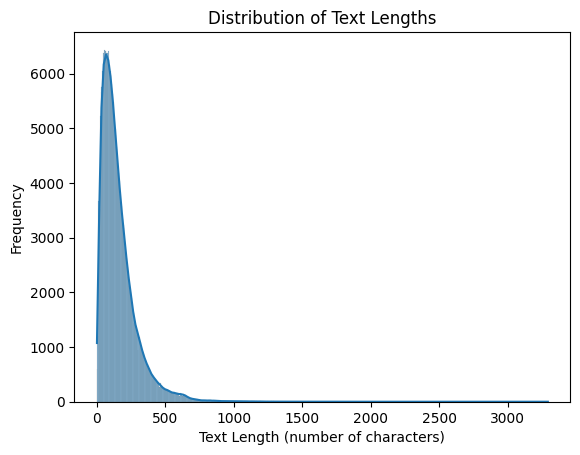

In [12]:
#length of each text
df['text_length'] = df['cleaned_text'].apply(len)

#text length statistics
df['text_length'].describe()

#distribution of text lengths
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.show()


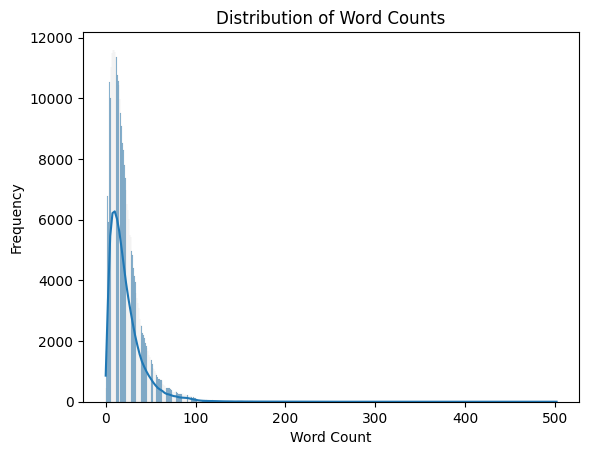

In [13]:
# Counting the number of words in each text
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# word count statistics
df['word_count'].describe()

#distribution of word counts
sns.histplot(df['word_count'], kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [14]:
from collections import Counter

# Combining all the cleaned text into one string and split into words
all_words = ' '.join(df['cleaned_text']).split()

# Getting the frequency of each word
word_freq = Counter(all_words)

# Displaying the most common words
most_common_words = word_freq.most_common(20)
most_common_words


[('great', 197621),
 ('stay', 179195),
 ('place', 162386),
 ('asheville', 129828),
 ('location', 112931),
 ('clean', 103279),
 ('would', 82804),
 ('downtown', 82168),
 ('everything', 74789),
 ('perfect', 71353),
 ('comfortable', 66298),
 ('house', 60881),
 ('home', 59516),
 ('close', 56124),
 ('space', 55983),
 ('br', 55444),
 ('definitely', 55256),
 ('recommend', 54453),
 ('nice', 50875),
 ('us', 47711)]

In [15]:
#Getting rid of line break words such as br
unwanted_words = ['br', 'de', 'et']

# Function to filter out unwanted words
def remove_unwanted_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in unwanted_words]
    return ' '.join(filtered_words)

# Apply the function to the cleaned_text column
df['cleaned_text'] = df['cleaned_text'].apply(remove_unwanted_words)

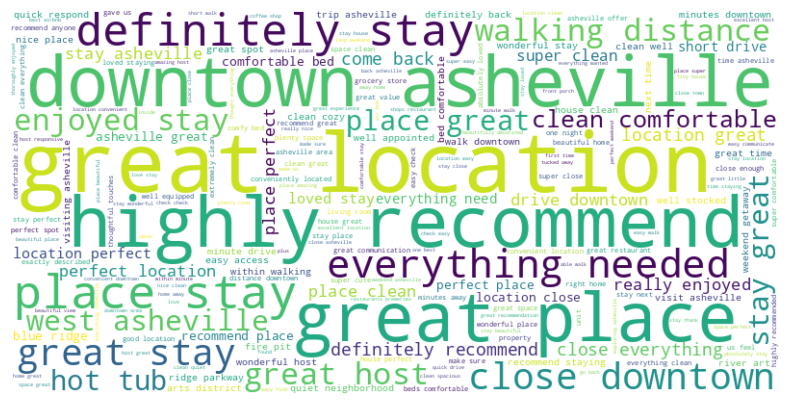

In [16]:
from wordcloud import WordCloud

#word cloud from the preprocessed text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for bi-grams
bi_gram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bi_gram_matrix = bi_gram_vectorizer.fit_transform(df['cleaned_text'])

# Get the bi-grams and their frequencies
bi_gram_counts = bi_gram_matrix.sum(axis=0).A1
bi_grams = bi_gram_vectorizer.get_feature_names_out()

# Create a DataFrame for bi-grams and their counts
bi_gram_df = pd.DataFrame({'bi_gram': bi_grams, 'count': bi_gram_counts})
bi_gram_df = bi_gram_df.sort_values(by='count', ascending=False).head(10)

# Display the top 10 most frequent bi-grams
bi_gram_df


,bi_gram,count
495086,great location,36328
1256983,would definitely,26855
527264,highly recommend,25780
334069,downtown asheville,24792
842475,place stay,23100
495588,great place,22512
300531,definitely stay,20468
389595,everything needed,16033
218097,close downtown,14070
496283,great stay,13889


In [18]:
# Creating a CountVectorizer for tri-grams
tri_gram_vectorizer = CountVectorizer(ngram_range=(3, 3))
tri_gram_matrix = tri_gram_vectorizer.fit_transform(df['cleaned_text'])

# Get the tri-grams and their frequencies
tri_gram_counts = tri_gram_matrix.sum(axis=0).A1
tri_grams = tri_gram_vectorizer.get_feature_names_out()

# Create a DataFrame for tri-grams and their counts
tri_gram_df = pd.DataFrame({'tri_gram': tri_grams, 'count': tri_gram_counts})
tri_gram_df = tri_gram_df.sort_values(by='count', ascending=False).head(10)

# Display the top 10 most frequent tri-grams
tri_gram_df


,tri_gram,count
3872093,would definitely stay,15506
1550313,great place stay,8876
3874131,would highly recommend,6567
3872059,would definitely recommend,6247
3833189,within walking distance,5243
476693,blue ridge parkway,4946
2820492,really enjoyed stay,3959
2938417,river arts district,3651
677973,close downtown asheville,3593
1642666,highly recommend staying,3106


In [19]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Applying sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
df.sentiment

,sentiment
0,0.466667
1,0.359470
2,0.535937
3,0.310060
4,0.230000
...,...
331713,0.392857
331714,0.316429
331715,0.268182
331716,0.650000


In [20]:
# Display sentiment scores using TextBlob
df[['comments', 'cleaned_text', 'sentiment']].head()


,comments,cleaned_text,sentiment
0,We had a wonderful time! The cottage was very ...,wonderful time cottage comfortable although be...,0.466667
1,Place was great! Can't really speak to the ins...,place great really speak inside went inside ch...,0.359470
2,We had a great time! The cabin was nice and a...,great time cabin nice great value people frien...,0.535937
3,Clean and comfortable room with everything you...,clean comfortable room everything need short s...,0.310060
4,The cabin was solid for an overnight stay. It ...,cabin solid overnight stay bit smaller appeare...,0.230000


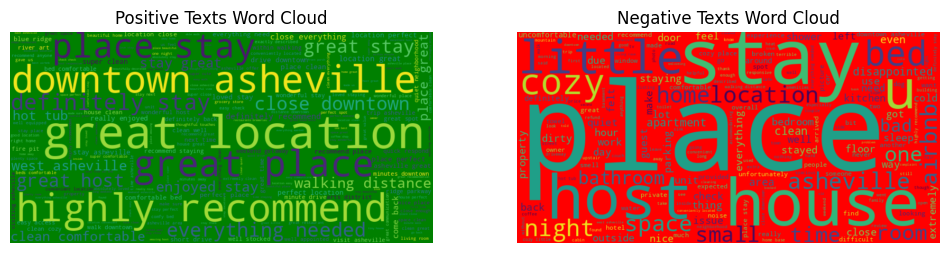

In [22]:
# Filter positive and negative texts
positive_texts = ' '.join(df[df['sentiment'] > 0]['cleaned_text'])
negative_texts = ' '.join(df[df['sentiment'] < 0]['cleaned_text'])

# Generate word clouds for positive and negative texts
positive_wordcloud = WordCloud(width=800, height=400, background_color='green').generate(positive_texts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_texts)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Texts Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Texts Word Cloud')
plt.axis('off')

plt.show()
